In [7]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
import os
import galsim
import numpy as np
import matplotlib.pylab as plt
import time
import fpfs

import sys
sys.path.append('/home/b7009348/FPFS-project/')

import batsim.pltutil as batplot
from batsim.stamp import Stamp
from batsim.transforms import IaTransform, LensTransform

Text(0.5, 1.0, 'Preliminary')

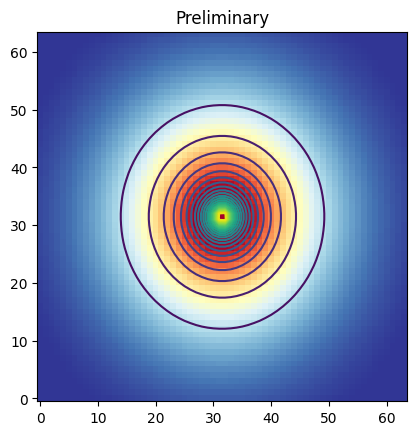

In [10]:
## create a galaxy with raidall dependent shear
flux = 40
scale = 0.2
nn = 64
hlr = 2.4

# create galaxy to be sampled by shear stamp objects
sersic_gal = galsim.Sersic(n=1.5, half_light_radius=hlr, flux=flux, trunc=0)

g1 = -0.012
g2 = 0.0

# # apply lensing shear to galaxy
stamp = Stamp(nn=nn, scale=scale)
lens = LensTransform(g1=0.2, g2=g2, kappa=0)
# stamp.transform_grids(lens)

# define ia shear as a % of lensing
ia_perc = 1
ia = IaTransform(g1=ia_perc*g1, g2=ia_perc*g2, 
                 center=[33,33], scale=scale, hlr=hlr)
stamp.transform_grids(ia)

# get galaxy array from stamp object
gal_array = stamp.sample_galaxy(sersic_gal)
batplot.make_plot_image(gal_array)
plt.contour(gal_array, levels=30)
plt.title('Preliminary')

In [158]:
gal_array3 = stamp.sample_galaxy(sersic_gal)

# define sheared PSF
psf_array = np.zeros(stamp.shape)
psf_array[nn // 2, nn // 2] = 1

coords = np.array([nn//2, nn//2])
fpTask  =   fpfs.image.measure_source(psf_array, pix_scale = scale, sigma_arcsec=0.6)
mms =  fpTask.measure(gal_array3, coords)
mms = fpTask.get_results(mms)
ells=   fpfs.catalog.fpfs_m2e(mms,const=2000)
resp=np.average(ells['fpfs_R1E'])
shear=np.average(ells['fpfs_e1'])/resp
print("measured shear: %.5f" % shear)

inner_shear = shear

2023/10/16 21:41:14 ---  Order of the shear estimator: nnord=4
2023/10/16 21:41:14 ---  Shapelet kernel in configuration space: sigma= 0.6000 arcsec
2023/10/16 21:41:14 ---  Detection kernel in configuration space: sigma= 0.6000 arcsec


measured shear: 0.21599


In [159]:
fpTask  =   fpfs.image.measure_source(psf_array, pix_scale = scale, sigma_arcsec=1.0)
mms =  fpTask.measure(gal_array3, coords)
mms = fpTask.get_results(mms)
ells=   fpfs.catalog.fpfs_m2e(mms,const=2000)
resp=np.average(ells['fpfs_R1E'])
shear=np.average(ells['fpfs_e1'])/resp
print("measured shear: %.5f" % shear)

outer_shear = shear

2023/10/16 21:41:15 ---  Order of the shear estimator: nnord=4
2023/10/16 21:41:15 ---  Shapelet kernel in configuration space: sigma= 1.0000 arcsec
2023/10/16 21:41:15 ---  Detection kernel in configuration space: sigma= 1.0000 arcsec


measured shear: 0.21656


In [160]:
perc = (outer_shear - inner_shear)/inner_shear * 100
print('Percentage difference in shear values:', perc)

print('a =', inner_shear / outer_shear)

Percentage difference in shear values: 0.2622132256092564
a = 0.997384725339952
